In [1]:
import numpy as np
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import t
import math
from math import sqrt, pow
import pandas as pd
import matplotlib.pyplot as plt
import re 

#population sizes
dep_n = 71
fam_n = 103
hc_n = 105

In [2]:
df_behav = pd.read_csv("behavioral_data.csv")
df_behav.head()

,DEP_DEP,DEP_SAD,DEP_ALC,DEP_TOB,DEP_SOC,DEP_RAND,DEP_UNS,FAM_DEP,FAM_SAD,FAM_ALC,...,FAM_SOC,FAM_RAND,FAM_UNS,HC_DEP,HC_SAD,HC_ALC,HC_TOB,HC_SOC,HC_RAND,HC_UNS
0,6.0,48.2,3.0,0.0,50.0,50.0,0.0,2.0,48.1,6.0,...,40.0,50.0,10.0,0.0,34.2,0.0,0.0,50.0,40.0,10.0
1,7.0,51.3,1.0,0.0,60.0,40.0,0.0,2.0,43.6,1.0,...,50.0,50.0,0.0,0.0,48.5,0.0,0.0,50.0,50.0,0.0
2,8.0,54.3,15.0,0.0,50.0,50.0,0.0,0.0,34.2,0.0,...,30.0,20.0,50.0,3.0,56.2,2.0,0.0,40.0,50.0,10.0
3,7.0,45.7,0.0,0.0,50.0,50.0,0.0,0.0,48.2,0.0,...,25.0,50.0,25.0,0.0,49.4,0.0,0.0,50.0,50.0,0.0
4,6.0,65.8,0.0,0.0,50.0,50.0,0.0,9.0,64.0,0.0,...,30.0,40.0,30.0,0.0,39.6,0.0,0.0,40.0,50.0,10.0


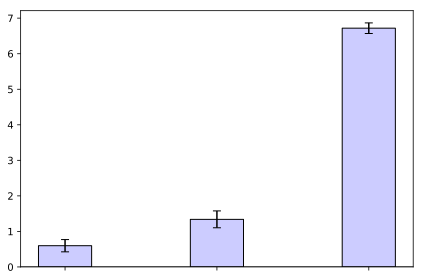

In [3]:
# [DEPRESSIVE SX GRAPH]

%config InlineBackend.figure_format = 'svg'

# data to plot
n_groups = 3 #HC, FAM, DEP
depsx_means = (df_behav["HC_DEP"].mean(), df_behav["FAM_DEP"].mean(), df_behav["DEP_DEP"].mean())

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 1

mentalbars = plt.bar(index, depsx_means, bar_width,
alpha=opacity,
edgecolor="#000000",
linewidth=1,
color='#ccccff',
yerr=(df_behav["HC_DEP"].std()/math.sqrt(105), df_behav["FAM_DEP"].std()/math.sqrt(103),df_behav["DEP_DEP"].std()/math.sqrt(71)),
capsize=4)

#ax.set_yticklabels([])
plt.xticks(index, ('', '', ''))
plt.axhline(linewidth=1, color='black')

plt.tight_layout()

#plt.savefig("results_depsx.svg",format='svg', transparent=True)

plt.show()

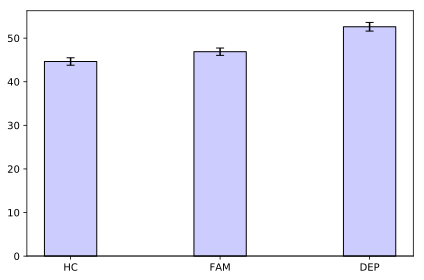

In [4]:
# [Sadness Scores GRAPH]

%config InlineBackend.figure_format = 'svg'

# data to plot
n_groups = 3 #HC, FAM, DEP
depsx_means = (df_behav["HC_SAD"].mean(), df_behav["FAM_SAD"].mean(),df_behav["DEP_SAD"].mean())

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 1

mentalbars = plt.bar(index, depsx_means, bar_width,
alpha=opacity,
edgecolor="#000000",
linewidth=1,
color='#ccccff',
yerr=(df_behav["HC_SAD"].std()/math.sqrt(105), df_behav["FAM_SAD"].std()/math.sqrt(103),df_behav["DEP_SAD"].std()/math.sqrt(71)),
capsize=4)

#ax.set_yticklabels([])
#plt.ylim((40,70))
plt.xticks(index, ('HC', 'FAM', 'DEP'))
plt.axhline(linewidth=1, color='black')

plt.tight_layout()

#plt.savefig("results_sad.svg",format='svg', transparent=True)

plt.show()

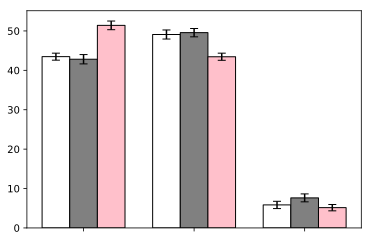

In [7]:
#the social ToM plot
barwidth = 0.35
fig, ax = plt.subplots()

#right now, this has 4 clusters of bars, but only on two axes 
group = ['Social','Random','Unsure']

hc_mean = [df_behav["HC_SOC"].mean(),df_behav["HC_RAND"].mean(),df_behav["HC_UNS"].mean()]
hcerror=[df_behav["HC_SOC"].std()/math.sqrt(105),df_behav["HC_RAND"].std()/math.sqrt(105), df_behav["HC_UNS"].std()/math.sqrt(105)]

dep_mean = [df_behav["DEP_SOC"].mean(),df_behav["DEP_RAND"].mean(),df_behav["DEP_UNS"].mean()]
deperror=[df_behav["DEP_SOC"].std()/math.sqrt(71),df_behav["DEP_RAND"].std()/math.sqrt(71), df_behav["DEP_UNS"].std()/math.sqrt(71)]

fam_mean = [df_behav["FAM_SOC"].mean(),df_behav["FAM_RAND"].mean(),df_behav["FAM_UNS"].mean()]
famerror=[df_behav["FAM_SOC"].std()/math.sqrt(103),df_behav["FAM_RAND"].std()/math.sqrt(103), df_behav["FAM_UNS"].std()/math.sqrt(103)]


xpos = np.arange(len(group))

plt.bar(xpos+.2, hc_mean, label="HC", width=barwidth-.1, color='white', edgecolor='black', yerr=deperror, capsize=4)
plt.bar(xpos+.45, fam_mean, label="FAM", width=barwidth-.1, color='grey', edgecolor='black', yerr=famerror, capsize=4)
plt.bar(xpos+barwidth*2.0, dep_mean, label="DEP", width=barwidth-.1, color='pink', edgecolor='black', yerr=hcerror, capsize=4)

#ax.set_yticklabels([])
plt.xticks(index, ('', '', ''))
plt.xticks(xpos+barwidth+0.1)
#plt.ylim((0,70))


#plt.savefig("results_task.svg",format='svg', transparent=True)      
plt.show()



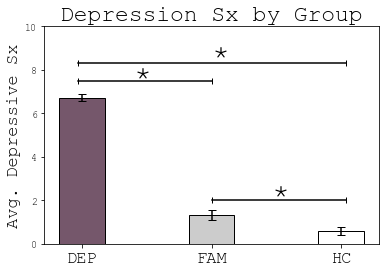

In [117]:
# [DEPRESSIVE SX GRAPH]
#size attributes of bars
barwidth = 0.35

#color attributes of bars
baredge = 'black'

#depbar = '#bb99ff'
#hcbar = 'black'
#fambar = 'pink'

group = ['','FAM','HC']

data = [6.718309859,1.339805825,0.59047619]
error=[0.149018382,0.236798157,0.175252428]

index = np.arange(len(group))

ax=plt.bar(index, data, width=barwidth, color='red', edgecolor=baredge, yerr=error, capsize=4)

#the depression group bar
ax[0].set_color('#75576b')
ax[0].set_edgecolor(baredge)
#ax[0].set_label("Depression") Legend

#the family history bar
ax[1].set_color('#cccccc')
ax[1].set_edgecolor(baredge)
#ax[1].set_label("Family History") Legend

#the HC group bar
ax[2].set_color('white')
ax[2].set_edgecolor(baredge)
#ax[2].set_label("Healthy Controls") Legend


plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Courier New'
plt.xticks(index,group, fontsize=17, fontweight='normal') #it will replace the xposition values with the company names
plt.ylabel("Avg. Depressive Sx", fontsize=17, fontweight='normal')
plt.title('Depression Sx by Group', fontsize=23, fontweight='ultralight')
plt.ylim((0,10))

#plt.legend(loc=(0.65, 0.7)) I dont need a legend for this one

#this is how I get the significance star




#DEP VS FAM SIG LINE
plt.axhline(y=7.5, xmin=0.1, xmax=0.5,linewidth=1.5, color='black', marker='|')
plt.text(0.4,7.3,"*", fontsize=30, color='black')

#DEP VS HC SIG LINE 
plt.axhline(y=8.3, xmin=0.1, xmax=.9,linewidth=1.5, color='black', marker='|')
plt.text(1,8.3,"*", fontsize=30, color='black')

#FAM VS HC SIG LINE
plt.axhline(y=2, xmin=0.5, xmax=.9,linewidth=1.5, color='black', marker='|')
plt.text(1.46,1.9,"*", fontsize=30, color='black')

plt.savefig('DepressionSx_plot_paper', dpi=100)


plt.show()

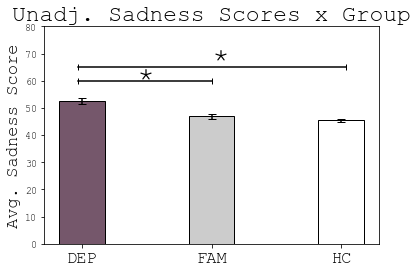

In [124]:
# [SADNESS SCORES GRAPH]

#size attributes of bars
barwidth = 0.35

#color attributes of bars
baredge = 'black'

#depbar = '#bb99ff'
#hcbar = 'black'
#fambar = 'pink'

group = ['DEP','FAM','HC']

data = [52.6084507,46.88446602,45.40761905]
error=[0.994847382,0.841822465,0.669424737]

index = np.arange(len(group))

ax=plt.bar(index, data, width=barwidth, color='red', edgecolor=baredge, yerr=error, capsize=4)

#the depression group bar
ax[0].set_color('#75576b')
ax[0].set_edgecolor(baredge)
#ax[0].set_label("Depression") Legend

#the family history bar
ax[1].set_color('#cccccc')
ax[1].set_edgecolor(baredge)
#ax[1].set_label("Family History") Legend

#the HC group bar
ax[2].set_color('white')
ax[2].set_edgecolor(baredge)
#ax[2].set_label("Healthy Controls") Legend


plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Courier New'
plt.xticks(index,group, fontsize=17, fontweight='normal') #it will replace the xposition values with the company names
plt.ylabel("Avg. Sadness Score", fontsize=17, fontweight='normal')
plt.title('Unadj. Sadness Scores x Group', fontsize=23, fontweight='ultralight')
plt.ylim((0,80))

#plt.legend(loc=(0.65, 0.7)) I dont need a legend for this one

#DEP VS FAM SIG
plt.text(.42,58,"*", fontsize=30,color='black')
plt.axhline(y=60, xmin=0.1, xmax=.5,linewidth=1.5, color='black', marker='|')

#DEP VS HC SIG 
plt.text(1,65,"*", fontsize=30,color='black')
plt.axhline(y=65, xmin=0.1, xmax=.9,linewidth=1.5, color='black', marker='|')

#plt.savefig('SadnessScores_plot_paper', dpi=100)


plt.show()

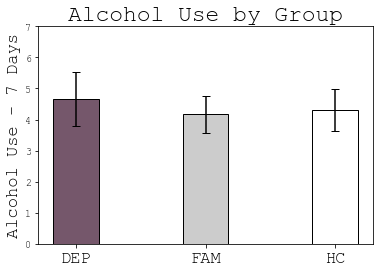

In [116]:
#[Alcohol 7 DAYS GRAPH]

#size attributes of bars
barwidth = 0.35

#color attributes of bars
baredge = 'black'

#depbar = '#bb99ff'
#hcbar = 'black'
#fambar = 'pink'

group = ['DEP','FAM','HC']

data = [4.661971831,4.165048544,4.304761905]
error=[0.853668533,0.601112157,0.67789858]

index = np.arange(len(group))

ax=plt.bar(index, data, width=barwidth, color='red', edgecolor=baredge, yerr=error, capsize=4)

#the depression group bar
ax[0].set_color('#75576b')
ax[0].set_edgecolor(baredge)
#ax[0].set_label("Depression") Legend

#the family history bar
ax[1].set_color('#cccccc')
ax[1].set_edgecolor(baredge)
#ax[1].set_label("Family History") Legend

#the HC group bar
ax[2].set_color('white')
ax[2].set_edgecolor(baredge)
#ax[2].set_label("Healthy Controls") Legend


plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Courier New'
plt.xticks(index,group, fontsize=17, fontweight='normal') #it will replace the xposition values with the company names
plt.ylabel("Alcohol Use - 7 Days", fontsize=17, fontweight='normal')
plt.title('Alcohol Use by Group', fontsize=23, fontweight='ultralight')
plt.ylim((0,7))



#plt.legend(loc=(0.65, 0.7)) I dont need a legend for this one

#this is how I get the significance star
#plt.text(.42,38,"*", fontsize=30)

plt.savefig('AlcoholUse_plot_paper', dpi=100)


plt.show()

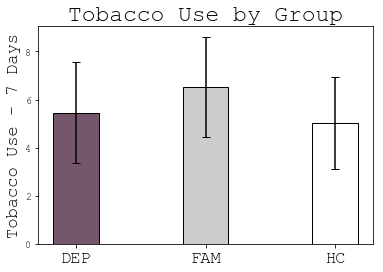

In [122]:
#[TOBACCO USE 7 DAYS GRAPH]

#size attributes of bars
barwidth = 0.35

#color attributes of bars
baredge = 'black'

#depbar = '#bb99ff'
#hcbar = 'black'
#fambar = 'pink'

group = ['DEP','FAM','HC']

data = [5.450704225,6.533980583,5.019047619]
error=[2.111174517,2.076713398,1.89659329]

index = np.arange(len(group))

ax=plt.bar(index, data, width=barwidth, color='red', edgecolor=baredge, yerr=error, capsize=4)

#the depression group bar
ax[0].set_color('#75576b')
ax[0].set_edgecolor(baredge)
#ax[0].set_label("Depression") Legend

#the family history bar
ax[1].set_color('#cccccc')
ax[1].set_edgecolor(baredge)
#ax[1].set_label("Family History") Legend

#the HC group bar
ax[2].set_color('white')
ax[2].set_edgecolor(baredge)
#ax[2].set_label("Healthy Controls") Legend


plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Courier New'
plt.xticks(index,group, fontsize=17, fontweight='normal') #it will replace the xposition values with the company names
plt.ylabel("Tobacco Use - 7 Days", fontsize=17, fontweight='normal')
plt.title('Tobacco Use by Group', fontsize=23, fontweight='ultralight')

#plt.legend(loc=(0.65, 0.7)) I dont need a legend for this one

#this is how I get the significance star
#plt.text(.42,38,"*", fontsize=30)

plt.savefig('TobaccoUse_plot_paper', dpi=100)


plt.show()

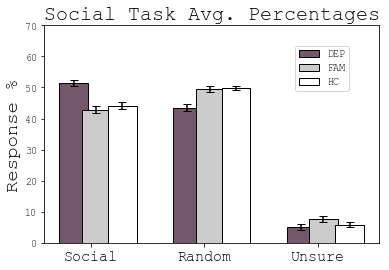

In [125]:
#the social ToM plot

#right now, this has 4 clusters of bars, but only on two axes 
group = ['Social','Random','Unsure']

depdata = [51.4084507,43.45070423,5.14084507]
deperror=[0.886876704,1.154954115,0.924579577]

famdata = [42.81553398,49.5631068,7.621359223]
famerror=[1.184224915,1.060035837,1.006462698]

hcdata = [44.19047619,49.95238095,5.857142857]
hcerror=[0.985526694,0.671554557,0.813285807]


xpos = np.arange(len(group))

plt.bar(xpos+.2, depdata, label="DEP", width=barwidth-.1, color='#75576b', edgecolor='black', yerr=deperror, capsize=4)
plt.bar(xpos+.4, famdata, label="FAM", width=barwidth-.1, color='#cccccc', edgecolor='black', yerr=famerror, capsize=4)
plt.bar(xpos+barwidth*1.8, hcdata, label="HC", width=barwidth-.1, color='white', edgecolor='black', yerr=hcerror, capsize=4)

plt.xticks(xpos+barwidth,group,fontsize=15)
plt.ylabel("Response %", fontsize=19)
plt.title('Social Task Avg. Percentages', fontsize=20)
plt.legend(loc=(0.75,0.7))
plt.ylim((0,70))

plt.savefig('SocialTask_plot_paper', dpi=100)       
plt.show()


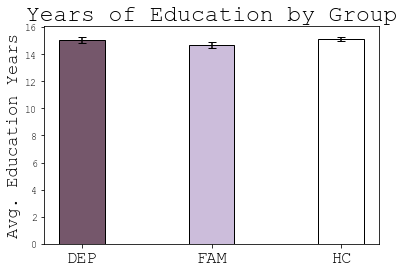

In [126]:
# [EDU GRAPH]
#size attributes of bars
barwidth = 0.35

#color attributes of bars
baredge = 'black'

group = ['DEP','FAM','HC']

data = [15.04225352,14.67961165,15.12380952]
error=[0.205004412,0.189789624,0.167777564]

index = np.arange(len(group))

ax=plt.bar(index, data, width=barwidth, color='red', edgecolor=baredge, yerr=error, capsize=4)

#the depression group bar
ax[0].set_color('#75576b')
ax[0].set_edgecolor(baredge)
#ax[0].set_label("Depression") Legend

#the family history bar
ax[1].set_color('#ccbddb')
ax[1].set_edgecolor(baredge)
#ax[1].set_label("Family History") Legend

#the HC group bar
ax[2].set_color('white')
ax[2].set_edgecolor(baredge)
#ax[2].set_label("Healthy Controls") Legend


plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Courier New'
plt.xticks(index,group, fontsize=17, fontweight='normal') #it will replace the xposition values with the company names
plt.ylabel("Avg. Education Years", fontsize=17, fontweight='normal')
plt.title('Years of Education by Group', fontsize=23, fontweight='ultralight')

#plt.legend(loc=(0.65, 0.7)) I dont need a legend for this one

#this is how I get the significance star
#plt.text(.42,38,"*", fontsize=30)

#plt.savefig('Education_plot', dpi=100)


plt.show()